In [1]:
pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.5/544.5 kB 746.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

#   Import libraries

In [2]:
import pandas as pd 
import numpy as np
import pycaret
import seaborn as sns
import matplotlib.pyplot as plt

## Reading data

In [3]:
df_train=pd.read_csv('../input/house-prediction/train1.csv')
df_test=pd.read_csv('../input/house-prediction/test1.csv')

In [4]:
df_test.set_index('Id',inplace=True)
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Finding null value in data train

In [5]:
df_train['SalePrice'].isna().sum()


0

# findind the correlation between features with target sales price

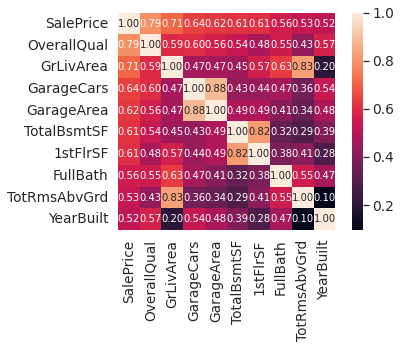

In [6]:
corr = df_train.corr()
#correlation matrix
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

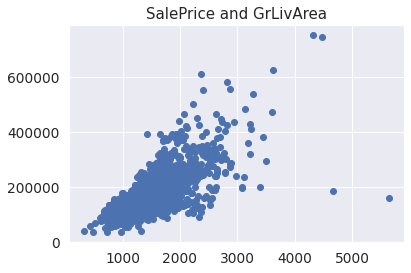

In [7]:
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])
plt.title('SalePrice and GrLivArea')
plt.show()

# Remove outliers

In [8]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:4]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [9]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)
df_train = df_train.drop(df_train[df_train['Id'] == 1183].index)
df_train = df_train.drop(df_train[df_train['Id'] == 692].index)


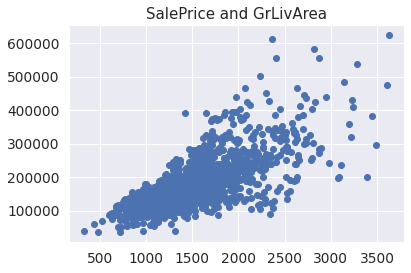

In [10]:
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])
plt.title('SalePrice and GrLivArea')
plt.show()

In [11]:
corr = df_train.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.800858
GrLivArea        0.720516
GarageCars       0.649256
TotalBsmtSF      0.646584
GarageArea       0.636964
1stFlrSF         0.625235
FullBath         0.559048
TotRmsAbvGrd     0.537462
YearBuilt        0.535279
YearRemodAdd     0.521428
GarageYrBlt      0.499230
MasVnrArea       0.478862
Fireplaces       0.466765
BsmtFinSF1       0.395923
LotFrontage      0.356773
OpenPorchSF      0.330361
WoodDeckSF       0.322538
2ndFlrSF         0.297301
HalfBath         0.282925
LotArea          0.269866
BsmtFullBath     0.235697
BsmtUnfSF        0.220678
BedroomAbvGr     0.160542
ScreenPorch      0.118324
MoSold           0.056797
3SsnPorch        0.047414
PoolArea         0.032819
BsmtFinSF2      -0.008900
MiscVal         -0.021097
YrSold          -0.023694
LowQualFinSF    -0.025351
Id              -0.027455
BsmtHalfBath    -0.036792
OverallCond     -0.080202
MSSubClass      -0.088160
EnclosedPorch   -0.129774
KitchenAbvGr    -0.138849
Name: SalePr

# Remove low correlation features with target

In [12]:
corr[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [13]:
df_train = df_train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
df_test = df_test[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [14]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
LotFrontage,259,0.177885
GarageYrBlt,81,0.055632
MasVnrArea,8,0.005495
FullBath,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
TotRmsAbvGrd,0,0.000000


# Remove high missing value fetures


In [15]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 81]).index,1)

In [16]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
GarageYrBlt,81,0.055632
MasVnrArea,8,0.005495
OverallQual,0,0.000000
TotRmsAbvGrd,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
FullBath,0,0.000000


In [17]:
total_test = df_test.isnull().sum().sort_values(ascending=False)
percent_test = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(20)

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
GarageArea,1,0.000685
BsmtFinSF1,1,0.000685
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685
TotRmsAbvGrd,0,0.000000
WoodDeckSF,0,0.000000
Fireplaces,0,0.000000


In [18]:
#dealing with missing data
df_test = df_test.drop((missing_data_test[missing_data_test['Total'] > 78]).index,1)

In [19]:
df_test.isnull().sum().sort_values(ascending=False).head(20)


GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
OverallQual      0
TotRmsAbvGrd     0
WoodDeckSF       0
Fireplaces       0
GrLivArea        0
FullBath         0
YearBuilt        0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
OpenPorchSF      0
dtype: int64

# Filling missing value

In [20]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean())
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())

df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean())
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())

In [21]:
df_train = pd.get_dummies(df_train)

In [22]:
df_test = pd.get_dummies(df_test)

In [23]:
all_data_na = (df_test.isnull().sum() / len(df_test)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
BsmtFinSF1,0.06854
TotalBsmtSF,0.06854
GarageCars,0.06854
GarageArea,0.06854


In [24]:
for col in ( 'GarageArea', 'GarageCars'):
    df_test[col] = df_test[col].fillna(0)
for col in ('BsmtFinSF1','TotalBsmtSF'):
    df_test[col] = df_test[col].fillna(0)

In [25]:
all_data_na = (df_test.isnull().sum() / len(df_test)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [26]:
df_train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


# Use pycaret to predict

In [27]:
from pycaret.regression import *

In [28]:
exp_reg101 = setup(data = df_train, target = 'SalePrice', session_id=123) 

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Data shape,"(1456, 18)"
4,Train data shape,"(1019, 18)"
5,Test data shape,"(437, 18)"
6,Numeric features,17
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [29]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,17534.8188,688201660.7356,25972.6511,0.8855,0.1439,0.1042,2.7100
gbr,Gradient Boosting Regressor,18039.1224,718074763.6178,26488.7373,0.8805,0.1459,0.1069,0.1240
et,Extra Trees Regressor,18301.4486,757066722.7447,27162.1251,0.8753,0.1511,0.1093,0.2290
lightgbm,Light Gradient Boosting Machine,18442.9197,757617078.4395,27182.4206,0.8739,0.1504,0.1095,0.1850
rf,Random Forest Regressor,18555.0492,797253353.7279,27854.7134,0.8687,0.1528,0.1108,0.3320
xgboost,Extreme Gradient Boosting,19518.7384,829556560.5573,28571.2922,0.8613,0.1577,0.1157,0.3400
br,Bayesian Ridge,21761.3135,998264513.7160,31218.5987,0.8347,0.2293,0.1368,0.0250
llar,Lasso Least Angle Regression,21826.8913,998437468.2711,31242.6069,0.8344,0.2486,0.1376,0.0250
ridge,Ridge Regression,21853.1986,999378288.1133,31258.7657,0.8342,0.2545,0.1379,0.0260
lasso,Lasso Regression,21856.2075,999503746.9157,31261.3343,0.8341,0.2524,0.1380,0.0290


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [30]:
catboost=create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18338.5538,820831815.9033,28650.1626,0.8895,0.1633,0.1115
1,19265.2594,812160407.4061,28498.4282,0.8407,0.1571,0.1091
2,16885.9820,696863564.8242,26398.1735,0.8716,0.1466,0.1048
3,14529.9673,390711144.3820,19766.4146,0.9102,0.1318,0.1001
4,15965.8785,514017195.2741,22671.9473,0.9150,0.1471,0.1058
5,16808.9034,717664648.1011,26789.2637,0.8519,0.1424,0.1016
6,20296.7922,1051392293.4244,32425.1799,0.8777,0.1470,0.1086
7,21118.8393,845216659.1730,29072.6101,0.8955,0.1642,0.1227
8,15731.1113,527277164.0605,22962.5165,0.9054,0.1184,0.0873


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
evaluate_model(catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [32]:
unseen_predictions = predict_model(catboost, data=df_test)
unseen_predictions.head(100)

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Label
Id,,,,,,,,,,,,,,,,,,
1461,5.0,1961.0,1961.0,0.0,468.0,882.0,896.0,0.0,896.0,1.0,5.0,0.0,1961.000000,1.0,730.0,140.0,0.0,126563.633211
1462,6.0,1958.0,1958.0,108.0,923.0,1329.0,1329.0,0.0,1329.0,1.0,6.0,0.0,1958.000000,1.0,312.0,393.0,36.0,156843.340925
1463,5.0,1997.0,1998.0,0.0,791.0,928.0,928.0,701.0,1629.0,2.0,6.0,1.0,1997.000000,2.0,482.0,212.0,34.0,181982.250743
1464,6.0,1998.0,1998.0,20.0,602.0,926.0,926.0,678.0,1604.0,2.0,7.0,1.0,1998.000000,2.0,470.0,360.0,36.0,183784.776445
1465,8.0,1992.0,1992.0,0.0,263.0,1280.0,1280.0,0.0,1280.0,2.0,5.0,0.0,1992.000000,2.0,506.0,0.0,82.0,183985.701995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,5.0,1917.0,1950.0,0.0,0.0,689.0,725.0,499.0,1224.0,1.0,6.0,0.0,1917.000000,1.0,180.0,0.0,0.0,84985.473856
1557,5.0,1915.0,1950.0,0.0,1026.0,1212.0,1212.0,180.0,1392.0,1.0,6.0,0.0,1977.721191,0.0,0.0,0.0,0.0,108655.767432
1558,6.0,1940.0,1950.0,0.0,368.0,600.0,600.0,319.0,919.0,1.0,5.0,0.0,1940.000000,1.0,231.0,0.0,0.0,108326.351070


In [33]:
sample_submission=unseen_predictions[ 'Label']
sample_submission=pd.DataFrame(sample_submission)

sample_submission.head()
sample_submission.rename({'Label':'SalePrice'}, axis=1)

,SalePrice
Id,
1461,126563.633211
1462,156843.340925
1463,181982.250743
1464,183784.776445
1465,183985.701995
...,...
2915,59751.212044
2916,83614.305114
2917,177722.241143


In [34]:
sample_submission.to_csv('sample_submission.csv')

